In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras

In [2]:
data = pd.read_csv('D:\SunBase Data Intern\customer_churn_large_dataset.csv')
data = data.drop(columns=['Name', 'CustomerID'])
data.head()
# print(data.shape)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [11]:
# #NOrmalisation

# scaler = MinMaxScaler()
# data[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']] = scaler.fit_transform(data[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])
data['Total_Bill'] = data['Subscription_Length_Months']*data['Monthly_Bill']
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Total_Bill
0,63,Male,Los Angeles,17,73.36,236,0,1247.12
1,62,Female,New York,1,48.76,172,0,48.76
2,24,Female,Los Angeles,5,85.47,460,0,427.35
3,36,Female,Miami,3,97.94,297,1,293.82
4,46,Female,Miami,19,58.14,266,0,1104.66


NameError: name 'plt' is not defined

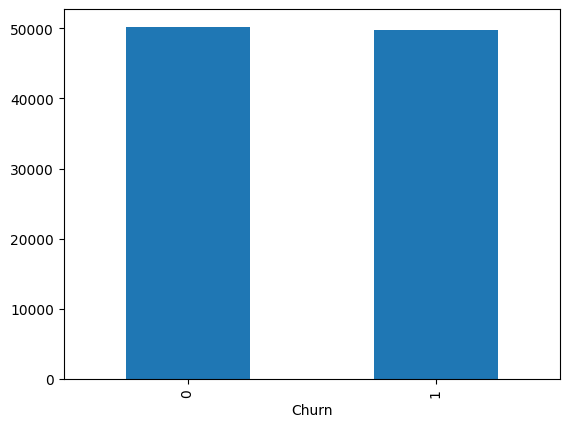

In [4]:
data.isnull().sum()

data['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# class_weights = compute_class_weight('balanced', classes=[0, 1], y=data['Churn'])
# print("Imbalance Ratio:", imbalance_ratio)
# print("Class Weights:", class_weights)


In [13]:
csv_X = data.drop(columns = ['Churn', 'Monthly_Bill', 'Subscription_Length_Months'], axis=1)
csv_X.head()

,Age,Gender,Location,Total_Usage_GB,Total_Bill
0,63,Male,Los Angeles,236,1247.12
1,62,Female,New York,172,48.76
2,24,Female,Los Angeles,460,427.35
3,36,Female,Miami,297,293.82
4,46,Female,Miami,266,1104.66


In [15]:
# X = data.drop(columns=['Churn'])
csv_y = data['Churn']
# X.head()
csv_y.head()
csv_y.shape

(100000,)

In [17]:
# # Encoding the categorical data
# unique = X['Location'].unique()
# # print(uniqe)

X = pd.DataFrame(csv_X)
y = pd.DataFrame(csv_y).values.ravel()

# X['Gender'] = X['Gender'].astype('category')
# X['Location'] = X['Location'].astype('category')


# y.head()

# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Gender', 'Location'])
X_encoded.head()

,Age,Total_Usage_GB,Total_Bill,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,236,1247.12,False,True,False,False,True,False,False
1,62,172,48.76,True,False,False,False,False,False,True
2,24,460,427.35,True,False,False,False,True,False,False
3,36,297,293.82,True,False,False,False,False,True,False
4,46,266,1104.66,True,False,False,False,False,True,False


In [19]:
#Spliting dataset into three parts: a training set, a validation set, and a test set.
#A common split is 70% for training, 15% for validation, and 15% for testing.

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32)

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to 0 or 1
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Epoch 1/150
2188/2188 [==============================] - 2s 889us/step - loss: 0.6946 - accuracy: 0.5005
Epoch 2/150
2188/2188 [==============================] - 2s 891us/step - loss: 0.6936 - accuracy: 0.5016
Epoch 3/150
2188/2188 [==============================] - 2s 995us/step - loss: 0.6932 - accuracy: 0.5028
Epoch 4/150
2188/2188 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 5/150
2188/2188 [==============================] - 2s 1ms/step - loss: 0.6932 - accuracy: 0.5024
Epoch 6/150
2188/2188 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 7/150
2188/2188 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.5053
Epoch 8/150
2188/2188 [==============================] - 2s 1ms/step - loss: 0.6931 - accuracy: 0.5055
Epoch 9/150
2188/2188 [==============================] - 2s 1ms/step - loss: 0.6930 - accuracy: 0.5054
Epoch 10/150
2188/2188 [==============================] - 2s 1ms/st